In [2]:
#Hypothesis testing 
import numpy as np
from scipy import stats

b = np.array([120, 122, 118, 130, 125, 128, 115, 121, 123, 119])
a = np.array([115, 120, 112, 128, 122, 125, 110, 117, 119, 114])
#null hypo: no changes in groups
#alternative hypo: changes in groups
alpha = 0.05
t_stat, p_value = stats.ttest_rel(a,b) #ttest_rel for related groups and ttest_ind for independent groups
print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: Significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")

T-statistic: -9.0
P-value: 8.538051223166285e-06
Reject the null hypothesis: Significant difference between groups.


In [3]:
#covariance and correlation. spearmam and pearson

a=np.arange(1,11).astype(int)
b=np.linspace(2,20,10).astype(int)

cov_matrix = np.cov(a, b)
correlation_matrix = np.corrcoef(a, b)
spearman_corr, _ = stats.spearmanr(a, b) #spearman is used for monotonic(not linear but same direction) correlation
pearson_corr, _ = stats.pearsonr(a, b) #pearson is used for linear correlation

print("Covariance Matrix:\n", cov_matrix)
print("Correlation Matrix:\n", correlation_matrix)

Covariance Matrix:
 [[ 9.16666667 18.33333333]
 [18.33333333 36.66666667]]
Correlation Matrix:
 [[1. 1.]
 [1. 1.]]


In [4]:
#Handling missing values
import pandas as pd

data1 = pd.DataFrame({'A': [1, 2, None, 4], 'B': [5, None, 7, 8]})
data2 = pd.DataFrame({'A': [None, 2, 3, 4], 'B': [5, 6, None, 8]})

data1.fillna(data1.mean(),inplace=True)
data2.fillna(data2.median(),inplace=True)

print(data1)
print("-----------------------------------------------------")
print(data2)
print("-----------------------------------------------------")
df=pd.DataFrame({'A': [1, 2, None, 4], 'B': [5, None, 7, 8]})
print(df)
df.dropna(inplace=True)
print(df)
print("-----------------------------------------------------")
df1=pd.DataFrame({'A': [1, 2, None, 4], 'B': [5, None, 7, 8]})
print(df1)
df1.dropna(axis=1,inplace=True)
print(df1)


          A         B
0  1.000000  5.000000
1  2.000000  6.666667
2  2.333333  7.000000
3  4.000000  8.000000
-----------------------------------------------------
     A    B
0  3.0  5.0
1  2.0  6.0
2  3.0  6.0
3  4.0  8.0
-----------------------------------------------------
     A    B
0  1.0  5.0
1  2.0  NaN
2  NaN  7.0
3  4.0  8.0
     A    B
0  1.0  5.0
3  4.0  8.0
-----------------------------------------------------
     A    B
0  1.0  5.0
1  2.0  NaN
2  NaN  7.0
3  4.0  8.0
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


In [5]:
#duplicate values
data = pd.DataFrame({'A': [1, 2, 2, 4], 'B': [5, 6, 6, 8]})
print(data)
print("-----------------------------------------------------")
data.drop_duplicates(inplace=True)
print(data)

   A  B
0  1  5
1  2  6
2  2  6
3  4  8
-----------------------------------------------------
   A  B
0  1  5
1  2  6
3  4  8


Z-scores:
 [0.50800051 0.31750032 0.31750032 0.22225022 0.31750032 0.12700013
 0.22225022 3.3020033  0.31750032 0.41275041 0.22225022 0.31750032]
-----------------------------------------------------
Outliers based on Z-score:
    Values
7      50
-----------------------------------------------------
lower bound, upper bound:  10.5 14.5
-----------------------------------------------------
Outliers based on IQR:
    Values
0      10
7      50


[]

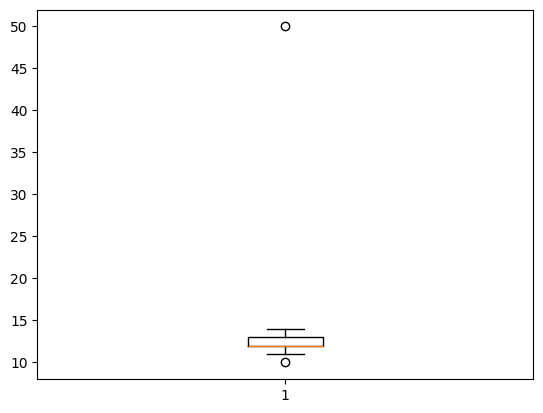

In [6]:
#Outlier detection and handling

data = pd.DataFrame({'Values': [10, 12, 12, 13, 12, 14, 13, 50, 12, 11, 13, 12]})
z_scores = np.abs(stats.zscore(data['Values']))
print("Z-scores:\n", z_scores)
print("-----------------------------------------------------")
threshold = 3 # because most of data lies under 3 SD for normal distribution
outliers = data[z_scores > threshold]
print("Outliers based on Z-score:\n", outliers)
print("-----------------------------------------------------")
Q1 = data['Values'].quantile(0.25)
Q3 = data['Values'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = data[(data['Values'] < lower_bound) | (data['Values'] > upper_bound)]
print("lower bound, upper bound: ",lower_bound, upper_bound)
print("-----------------------------------------------------")
print("Outliers based on IQR:\n", outliers_iqr)

import matplotlib.pyplot as plt
plt.boxplot(data['Values'])
plt.plot()

In [7]:
#Feature Scaling
import random
from sklearn.preprocessing import StandardScaler, MinMaxScaler

x = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
print("Original: \n",x)
SS=StandardScaler()
x1=SS.fit_transform(x)
x1=pd.DataFrame(x1)
MM=MinMaxScaler()
x2=MM.fit_transform(x)
x2=pd.DataFrame(x2)
print("Standard scaled: \n",x1)
print("MinMax Scaled: \n",x2)

Original: 
              x1         x2
0     20.430807  30.658282
1     18.507397  27.161545
2     22.314130  30.311706
3     20.838232  27.321566
4     22.485414  30.262776
...         ...        ...
1020   1.521311  53.042814
1021   4.813926  49.490114
1022   0.947432  52.441165
1023   0.927455  50.438265
1024   1.516216  53.832240

[1025 rows x 2 columns]
Standard scaled: 
              0         1
0     0.220660  0.050612
1    -0.322131 -0.903532
2     0.752138 -0.043957
3     0.335636 -0.859868
4     0.800475 -0.057309
...        ...       ...
1020 -5.115647  6.158611
1021 -4.186463  5.189197
1022 -5.277598  5.994441
1023 -5.283235  5.447916
1024 -5.117085  6.374019

[1025 rows x 2 columns]
MinMax Scaled: 
              0         1
0     0.802388  0.240818
1     0.732757  0.126265
2     0.870567  0.229464
3     0.817137  0.131507
4     0.876767  0.227861
...        ...       ...
1020  0.117836  0.974138
1021  0.237034  0.857751
1022  0.097061  0.954428
1023  0.096338  0.888813
102

In [11]:
#Data Transformation
from sklearn.preprocessing import PowerTransformer

x = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})

print(x.head())

x['x1']=np.log(x['x1'])
print(x.head())

pt=PowerTransformer()
x['x2']=pt.fit_transform(x[['x2']])
print(x.head())

          x1         x2
0  19.015129  30.832142
1  20.978236  28.427751
2  21.127014  32.548896
3  20.051727  27.068698
4  20.543419  30.829184
         x1         x2
0  2.945235  30.832142
1  3.043486  28.427751
2  3.050553  32.548896
3  2.998315  27.068698
4  3.022541  30.829184
         x1        x2
0  2.945235  0.363085
1  3.043486 -0.682904
2  3.050553  0.919982
3  2.998315 -1.463971
4  3.022541  0.362007


C:\Users\Lenovo\AppData\Roaming\Python\Python314\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
